# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

The task is to apply data analysis and machine learning techniques on a set of used car data, understand what factors decide used car price and come up with a set of guidelines for used car dealers.

### Data Understanding

I went over the data and did the following:
1. checked the geberal info and look at samples of the data
2. used the pandas value_counts(), min() and max() functions to examine values of each column
3. used pandas query to check outliers, e.g. price > 1000,000 and odometer > 300,000

In [687]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import  GridSearchCV
from random import shuffle, seed
import random
from sklearn.preprocessing import StandardScaler

set_config(display="diagram")

In [689]:
cars = pd.read_csv('data/vehicles.csv')

In [690]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [693]:
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [695]:
pd.set_option('display.max_columns', None)

In [697]:
cars.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
223916,7313087827,billings,53888,2011.0,ford,super duty f-350 drw king,NaN,8 cylinders,diesel,79287.0,clean,automatic,1FT8W3DT3BEA76941,4wd,NaN,truck,NaN,mt
36491,7303216162,merced,14388,2018.0,hyundai,elantra sel,good,4 cylinders,gas,84478.0,clean,automatic,5NPD84LF2JH257120,fwd,NaN,sedan,black,ca
121822,7316450122,atlanta,8900,2008.0,bmw,x5,NaN,NaN,gas,136188.0,clean,automatic,5UXFE83598L162526,NaN,NaN,NaN,NaN,ga
107479,7316176512,pensacola,13900,2009.0,audi,s5 sport coupe,NaN,NaN,gas,108692.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
238988,7310062193,hickory / lenoir,8995,2009.0,honda,cr-v,like new,4 cylinders,gas,177530.0,clean,automatic,3CZRE48579G704442,4wd,full-size,SUV,blue,nc
199234,7312769762,flint,9900,2013.0,nissan,murano,good,6 cylinders,gas,139000.0,clean,automatic,NaN,4wd,NaN,NaN,black,mi
55505,7315900192,san diego,7900,1957.0,ford,f450,NaN,NaN,gas,1000.0,missing,manual,NaN,NaN,NaN,NaN,NaN,ca
323416,7316549595,portland,19991,2018.0,subaru,impreza,excellent,4 cylinders,gas,53330.0,clean,manual,4S3GTAA61J1706646,4wd,compact,sedan,white,or
5484,7314864951,anchorage / mat-su,30499,2017.0,bmw,430i,NaN,4 cylinders,gas,32214.0,clean,other,WBA4F7C35HG787932,rwd,NaN,sedan,blue,ak
85371,7306331462,hartford,9995,2011.0,NaN,FORD* EDGE*,NaN,NaN,gas,143554.0,clean,automatic,2FMDK3JC5BBB31055,fwd,mid-size,other,blue,ct


In [699]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [701]:
cars["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [703]:
cars['paint_color'].value_counts()

paint_color
white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: count, dtype: int64

In [705]:
df = cars.drop(['id', 'size', 'VIN', 'title_status', 'region', 'condition', 'fuel'], axis=1)

In [707]:
df.sample(10)

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
281943,34990,2018.0,bmw,4 series 430i convertible 2d,NaN,39650.0,other,rwd,other,black,ny
374296,300,2012.0,chevrolet,cruze,NaN,134000.0,automatic,NaN,NaN,blue,tx
378736,3800,2008.0,ford,ranger,NaN,200000.0,manual,NaN,NaN,NaN,tx
117584,13900,2015.0,volvo,v60,4 cylinders,58317.0,automatic,fwd,hatchback,grey,fl
317978,12999,2007.0,gmc,yukon,NaN,171063.0,automatic,4wd,SUV,NaN,or
66126,26981,2020.0,toyota,camry,4 cylinders,5800.0,automatic,fwd,sedan,silver,ca
168408,63990,2019.0,gmc,sierra 1500,8 cylinders,31818.0,automatic,4wd,truck,white,ks
214001,0,2018.0,chevrolet,silverado 1500 ltz,8 cylinders,21001.0,automatic,4wd,NaN,NaN,mn
386660,49995,2015.0,gmc,sierra 2500hd available wifi,8 cylinders,122277.0,automatic,4wd,NaN,white,ut
283440,32480,2019.0,chevrolet,express cargo van,8 cylinders,24543.0,automatic,rwd,van,white,nh


In [709]:
df['model'].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

In [711]:
vCount = pd.DataFrame(df['model'].value_counts())

In [713]:
vCount[vCount['count'] <= 10]

,count
model,
f-350 diesel 4x4 7.3l power stroke turbo diesel ext cab long bed dually 6-speed manual,10
xterra xe,10
silverado 2500 diesel 4x4 6.6l lmm duramax turbo diesel crew cab long bed allison 1000 ltz,10
f250 superduty,10
sportage sx sport utility 4d,10
...,...
plymouth fury 1,1
f550 box truck delivery,1
duramax 2500hd,1


### Data Preparation
I went through Data preparation <-> Modeling three times, to corret problems and refine the model.

My first round of modeling was done before checking closely on the value range of price, I got very wild price predictions with maybe 30% of them in negative, e.g.:

       [55349.1997819 , 131630.43812658, -29487.2160868 ,   1256.34641751,
       -30364.93535473,  46489.62793431, -46423.01999251, 210653.4568858 ,
        58709.43448659, 253703.29984976,  84262.17928232, 126398.9523304 ,
       -35291.93552541,  -2878.65294636,  29698.68876195,  33888.36060247,
        -3117.20475549, -47344.69652718,  70756.80420065, -47416.07640295]


I then found a car with a price of 3736928711, 3.7 billion !!, this car alone can skew the prediction in a big way since its price is more than all other cars I have in my data (about 120,000 for that round). I need to limit the price to a reasonable range. I aslo found some outliers for the odometer column, e.g. 10,000,000 and 9,999,999.

After the 2nd round of modelling I found many 20-years old 200,000-miles cars to have "like new" consition, that cannot be true. The condition column seems to be a complete subjective description from previous owners/sellers. This triggered another round of data preparation by removing the condition column.

At the end I did the followings to prepare the data:

* removed columns that are not useful or contain many NaN, e.g. id, size, VIN, condition...
* removed outliers by selecting samples with price between 2000 and 100,000.
* removed outliers by selection samples with odometer < 200,000
* changed year to age with a simple conversion
* droped brands that have less than 100 samples
* drop samples strange contents, e.g. tramission = "other", cylinder = "other"



In [717]:
df = cars.drop(['id', 'size', 'VIN', 'title_status', 'region', 'condition', 'fuel'], axis=1)

In [719]:
df2 = df.dropna()


In [721]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157610 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         157610 non-null  int64  
 1   year          157610 non-null  float64
 2   manufacturer  157610 non-null  object 
 3   model         157610 non-null  object 
 4   cylinders     157610 non-null  object 
 5   odometer      157610 non-null  float64
 6   transmission  157610 non-null  object 
 7   drive         157610 non-null  object 
 8   type          157610 non-null  object 
 9   paint_color   157610 non-null  object 
 10  state         157610 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 14.4+ MB


In [723]:
df2.sample(10)

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
146247,37990,2016.0,toyota,tundra double cab sr,8 cylinders,22870.0,other,4wd,pickup,black,il
259299,61995,2020.0,ram,3500,6 cylinders,13962.0,automatic,4wd,pickup,white,nm
46522,4900,1997.0,bmw,740il,8 cylinders,139270.0,automatic,rwd,sedan,black,ca
51490,21995,2015.0,chevrolet,silverado 1500,6 cylinders,65396.0,automatic,4wd,pickup,white,ca
277836,33990,2014.0,ford,super duty f-550 drw,8 cylinders,136250.0,automatic,4wd,truck,white,ny
47262,5800,2004.0,jeep,liberty renegade 4x4,6 cylinders,148000.0,automatic,4wd,offroad,grey,ca
412382,44995,2014.0,ford,super duty f-350 srw,8 cylinders,110771.0,automatic,4wd,truck,white,wa
272684,13995,2015.0,volkswagen,passat,4 cylinders,39133.0,automatic,fwd,sedan,silver,ny
361983,26990,2017.0,ram,promaster cargo 3500 159 wb,6 cylinders,103793.0,automatic,fwd,van,white,tn
384485,3200,2002.0,dodge,durango,8 cylinders,182000.0,automatic,rwd,SUV,silver,tx


In [726]:
 df2[df2['price'] > 1000000]

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
29386,1111111111,1999.0,ford,f350 super duty lariat,8 cylinders,149000.0,automatic,rwd,pickup,white,ca
68935,2000000,2002.0,saturn,l-series l200 4dr sedan,4 cylinders,164290.0,automatic,fwd,sedan,green,ca
136516,17000000,2007.0,ram,2500,8 cylinders,170000.0,automatic,4wd,pickup,black,id
137807,123456789,1999.0,buick,regal,6 cylinders,96000.0,automatic,fwd,sedan,white,id
155421,1234567,2006.0,jeep,wrangler,6 cylinders,123456.0,automatic,4wd,SUV,custom,in
219241,1111111,1970.0,dodge,challenger,8 cylinders,42000.0,automatic,rwd,coupe,blue,ms
230753,135008900,2008.0,nissan,titan se kingcab,8 cylinders,110500.0,automatic,4wd,truck,grey,nc
307488,123456789,1996.0,gmc,sierra 2500,8 cylinders,320000.0,automatic,4wd,pickup,black,ok
318592,3736928711,2007.0,toyota,tundra,8 cylinders,164000.0,automatic,4wd,pickup,silver,or


In [729]:
df2[df2['price'] > 100000]

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
1727,130000,2019.0,chevrolet,corvette,8 cylinders,5000.0,automatic,rwd,coupe,blue,al
2922,140000,2015.0,jeep,renegade,6 cylinders,49658.0,other,fwd,SUV,yellow,al
4826,104900,2020.0,bmw,m805i,8 cylinders,9000.0,automatic,4wd,sedan,black,al
7109,116000,2019.0,ford,f350 diesels powerstroke,8 cylinders,24000.0,automatic,4wd,truck,white,ak
8901,229500,2018.0,ferrari,488 spider,8 cylinders,7910.0,automatic,rwd,convertible,red,az
...,...,...,...,...,...,...,...,...,...,...,...
410438,105858,2017.0,mercedes-benz,benz s63 amg,8 cylinders,13250.0,automatic,4wd,convertible,black,wa
412694,118000,2020.0,chevrolet,corvette,8 cylinders,2090.0,automatic,rwd,coupe,black,wa
419656,119900,2021.0,chevrolet,corvette,8 cylinders,601.0,automatic,rwd,coupe,red,wi
419756,119995,2004.0,acura,nsx,6 cylinders,16859.0,manual,rwd,coupe,black,wi


In [733]:
df2[df2['odometer'] > 300000]

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
562,27990,2014.0,ram,2500 4x4,6 cylinders,2222222.0,automatic,4wd,truck,white,al
615,0,2014.0,ram,2500 slt 4x4,6 cylinders,1111111.0,automatic,4wd,truck,white,al
616,17990,2018.0,ford,edge sel,6 cylinders,1111111.0,automatic,fwd,SUV,blue,al
618,0,2018.0,chevrolet,silverado 3500 ltz 4x4,8 cylinders,1111111.0,automatic,4wd,truck,black,al
621,0,2012.0,ram,3500 slt,6 cylinders,1111111.0,automatic,rwd,truck,white,al
...,...,...,...,...,...,...,...,...,...,...,...
423562,2995,2000.0,gmc,jimmy sle 4x4,6 cylinders,334608.0,automatic,4wd,SUV,black,wi
424990,14999,2014.0,ford,f-450,8 cylinders,312826.0,other,4wd,truck,white,wi
425544,700,1998.0,toyota,camry xle,6 cylinders,321132.0,automatic,fwd,sedan,grey,wi
425616,5500,2006.0,chevrolet,silverado 1500,8 cylinders,369000.0,automatic,4wd,pickup,red,wi


In [735]:
df2[df2['odometer'] > 1000000].sample(20)

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
234859,13000,2007.0,gmc,yukon,8 cylinders,9999999.0,automatic,rwd,SUV,white,nc
1669,0,2013.0,gmc,sierra 2500 hd denali 4x4,8 cylinders,9999999.0,automatic,4wd,truck,red,al
152499,3500,2009.0,ford,focus,4 cylinders,2251212.0,automatic,fwd,sedan,blue,in
378377,2700,2001.0,hyundai,accent,6 cylinders,9999999.0,automatic,fwd,SUV,silver,tx
1405,0,2015.0,gmc,yukon denali xl,8 cylinders,1111111.0,automatic,rwd,SUV,grey,al
130578,3500,1995.0,bmw,5 series,6 cylinders,2006332.0,manual,rwd,other,white,id
1399,0,2014.0,chevrolet,silverado z71 4x4,8 cylinders,9999999.0,automatic,4wd,truck,white,al
94862,10000,1999.0,ford,f350,8 cylinders,1176458.0,manual,4wd,pickup,silver,fl
317864,27000,1913.0,ford,"""t""",4 cylinders,9999999.0,other,rwd,convertible,red,or
151740,800,1949.0,ford,model a,4 cylinders,10000000.0,manual,rwd,sedan,black,in


In [737]:
cars['odometer'].max()

10000000.0

In [739]:
df2['odometer'].min()


0.0

In [741]:
df2['price'].min()

0

In [743]:
df2.value_counts('year')

year
2017.0    12058
2013.0    11669
2015.0    11660
2014.0    11611
2016.0    11488
          ...  
1913.0        2
1905.0        1
1944.0        1
1918.0        1
1900.0        1
Name: count, Length: 102, dtype: int64

In [746]:
df2[df2['price'] < 2000]

,price,year,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state
126,0,2018.0,chevrolet,express cargo van,6 cylinders,68472.0,automatic,rwd,van,white,al
127,0,2019.0,chevrolet,express cargo van,6 cylinders,69125.0,automatic,rwd,van,white,al
128,0,2018.0,chevrolet,express cargo van,6 cylinders,66555.0,automatic,rwd,van,white,al
191,0,2015.0,nissan,sentra,4 cylinders,99505.0,automatic,fwd,sedan,silver,al
239,0,2019.0,chevrolet,silverado 1500,8 cylinders,25127.0,automatic,4wd,truck,red,al
...,...,...,...,...,...,...,...,...,...,...,...
426539,0,2016.0,toyota,4runner trd pro,6 cylinders,45286.0,automatic,4wd,SUV,brown,wy
426558,1200,1999.0,volvo,s70,4 cylinders,252582.0,automatic,4wd,sedan,silver,wy
426689,1800,1997.0,toyota,4runner,6 cylinders,239000.0,automatic,rwd,SUV,white,wy
426744,800,2000.0,cadillac,deville,8 cylinders,100000.0,automatic,rwd,coupe,white,wy


In [749]:
df2 = df2[df2['price'] < 100000]

In [751]:
df2 = df2[df2['price'] > 2000]

In [753]:
df2 = df2[df2['odometer'] < 200000]

In [755]:
df2['age'] = 2022 - df2['year']
df2 = df2[df2['age'] < 20]
df2 = df2.drop(columns=['year'])

In [757]:
df2

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
31,15000,ford,f-150 xlt,6 cylinders,128000.0,automatic,rwd,truck,black,al,9.0
32,27990,gmc,sierra 2500 hd extended cab,8 cylinders,68696.0,other,4wd,pickup,black,al,10.0
33,34590,chevrolet,silverado 1500 double,6 cylinders,29499.0,other,4wd,pickup,silver,al,6.0
34,35000,toyota,tacoma,6 cylinders,43000.0,automatic,4wd,truck,grey,al,3.0
35,29990,chevrolet,colorado extended cab,6 cylinders,17302.0,other,4wd,pickup,red,al,6.0
...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,cadillac,xt6 premium luxury,6 cylinders,7701.0,other,fwd,other,black,wy,2.0
426860,39990,infiniti,qx80 sport utility 4d,8 cylinders,41664.0,automatic,4wd,other,black,wy,5.0
426866,32990,infiniti,qx80 sport utility 4d,8 cylinders,55612.0,automatic,rwd,other,black,wy,6.0
426874,33590,lexus,gs 350 sedan 4d,6 cylinders,30814.0,automatic,rwd,sedan,white,wy,4.0


In [765]:
df2.value_counts('manufacturer')

manufacturer
ford               21494
chevrolet          17043
toyota             10507
honda               7058
nissan              6913
jeep                6339
ram                 5042
gmc                 4898
dodge               4384
bmw                 3896
hyundai             3389
mercedes-benz       3190
subaru              2956
volkswagen          2635
kia                 2583
lexus               2571
chrysler            2121
cadillac            1641
audi                1625
infiniti            1573
buick               1503
mazda               1501
acura               1357
lincoln             1116
mitsubishi           842
mini                 781
volvo                767
pontiac              610
rover                533
saturn               335
porsche              332
jaguar               328
mercury              286
fiat                 202
alfa-romeo            66
tesla                 46
harley-davidson       13
aston-martin           7
land rover             6
Name: count,

In [768]:
df2=df2[(df2['manufacturer'] != 'aston-martin') & (df2['manufacturer'] != 'land rover') & (df2['manufacturer'] != 'ferrari') & (df2['manufacturer'] != 'datsun') & (df2['manufacturer'] != 'harley-davidson') & (df2['manufacturer'] != 'tesla') & (df2['manufacturer'] != 'alfa-romeo')]

In [770]:
df2.value_counts('manufacturer')

manufacturer
ford             21494
chevrolet        17043
toyota           10507
honda             7058
nissan            6913
jeep              6339
ram               5042
gmc               4898
dodge             4384
bmw               3896
hyundai           3389
mercedes-benz     3190
subaru            2956
volkswagen        2635
kia               2583
lexus             2571
chrysler          2121
cadillac          1641
audi              1625
infiniti          1573
buick             1503
mazda             1501
acura             1357
lincoln           1116
mitsubishi         842
mini               781
volvo              767
pontiac            610
rover              533
saturn             335
porsche            332
jaguar             328
mercury            286
fiat               202
Name: count, dtype: int64

In [773]:
df2.value_counts('drive')

drive
4wd    54552
fwd    44742
rwd    23057
Name: count, dtype: int64

In [775]:
df2.value_counts('cylinders')

cylinders
6 cylinders     45573
4 cylinders     43004
8 cylinders     31623
5 cylinders       943
10 cylinders      494
other             421
3 cylinders       261
12 cylinders       32
Name: count, dtype: int64

Here the cylinder has some strange value "other", we will remove those samples

In [779]:
df2[df2['cylinders'] == 'other']

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
5966,10000,chevrolet,spark,other,52000.0,automatic,fwd,hatchback,blue,ak,8.0
7360,4500,mazda,rx8,other,145000.0,manual,rwd,coupe,silver,ak,15.0
8391,6999,nissan,leaf,other,62102.0,automatic,fwd,hatchback,black,ak,10.0
8455,24995,nissan,leaf sl,other,5650.0,automatic,fwd,other,white,ak,3.0
10720,5500,nissan,leaf,other,74200.0,automatic,fwd,hatchback,white,az,9.0
...,...,...,...,...,...,...,...,...,...,...,...
411503,8000,mazda,rx8,other,108430.0,manual,rwd,sedan,black,wa,18.0
412397,17599,nissan,leaf,other,14500.0,other,fwd,hatchback,blue,wa,4.0
420502,17500,toyota,prius hybrid,other,91000.0,automatic,rwd,hatchback,blue,wi,5.0
420978,20900,gmc,sierra 2500hd slt,other,198486.0,automatic,4wd,pickup,black,wi,17.0


In [782]:
# drop those
df2 = df2.drop(df2[df2['cylinders'] == 'other'].index)

In [784]:
df2.value_counts('cylinders')

cylinders
6 cylinders     45573
4 cylinders     43004
8 cylinders     31623
5 cylinders       943
10 cylinders      494
3 cylinders       261
12 cylinders       32
Name: count, dtype: int64

In [787]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121930 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         121930 non-null  int64  
 1   manufacturer  121930 non-null  object 
 2   model         121930 non-null  object 
 3   cylinders     121930 non-null  object 
 4   odometer      121930 non-null  float64
 5   transmission  121930 non-null  object 
 6   drive         121930 non-null  object 
 7   type          121930 non-null  object 
 8   paint_color   121930 non-null  object 
 9   state         121930 non-null  object 
 10  age           121930 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.2+ MB


In [789]:
df2.value_counts('cylinders')

cylinders
6 cylinders     45573
4 cylinders     43004
8 cylinders     31623
5 cylinders       943
10 cylinders      494
3 cylinders       261
12 cylinders       32
Name: count, dtype: int64

In [791]:
def getNumber(s):
  return int(s.split()[0])

getNumber('3 cylinders')

3

In [793]:
df2['cylinders'] = df2['cylinders'].apply(getNumber)

In [795]:
df2.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
25958,17950,chevrolet,silverado 1500,8,181367.0,automatic,rwd,pickup,silver,ca,8.0
368106,16995,ford,mustang,8,116359.0,manual,rwd,coupe,blue,tx,9.0
185898,3495,nissan,altima 2.5 s,4,188000.0,automatic,fwd,sedan,blue,ma,12.0
348319,8500,volkswagen,passat tdi sel,4,97813.0,automatic,fwd,sedan,blue,sc,10.0
161698,39900,mercedes-benz,s65 amg,12,34708.0,automatic,rwd,sedan,black,ia,15.0
289747,5995,nissan,xterra,6,137875.0,automatic,4wd,SUV,blue,oh,16.0
56052,12800,honda,civic,4,80119.0,automatic,fwd,sedan,grey,ca,7.0
118652,8335,ford,ranger supercab edge,6,88396.0,manual,rwd,truck,black,fl,18.0
6997,40995,jaguar,xe s awd,6,15673.0,automatic,4wd,sedan,black,ak,4.0
196415,4200,buick,regal,4,150.0,automatic,fwd,sedan,silver,mi,10.0


In [798]:
df3 = df2.copy()

In [800]:
df3.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
221765,47995,ford,super duty f-250 srw,8,93000.0,automatic,4wd,truck,custom,mo,6.0
6456,17974,chevrolet,cruze,4,19146.0,other,fwd,sedan,red,ak,4.0
372326,6500,mini,cooper clubman,4,184000.0,manual,fwd,hatchback,blue,tx,13.0
216389,8495,subaru,legacy 2.5i premium awd,4,99786.0,automatic,4wd,sedan,grey,mn,8.0
132238,27999,ford,f-150 xl,8,115049.0,automatic,4wd,pickup,white,id,6.0
53550,28000,ford,explorer,6,85000.0,automatic,4wd,SUV,white,ca,5.0
171402,17998,bmw,5 series,6,62665.0,automatic,rwd,sedan,grey,ky,10.0
59650,19975,rover,sport,8,135000.0,automatic,4wd,SUV,custom,ca,9.0
423478,8650,lincoln,mkt,6,163984.0,automatic,fwd,wagon,red,wi,12.0
114039,12000,volkswagen,eos,4,82083.0,automatic,fwd,convertible,silver,fl,10.0


In [802]:
df3.value_counts('transmission')

transmission
automatic    103518
other         12852
manual         5560
Name: count, dtype: int64

We will also remove samples with "other" as the value of transmission

In [805]:
df3 = df3.drop(df3[df3['transmission'] == 'other'].index)

In [807]:
df3.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
417825,16977,jeep,grand cherokee laredo e,6,79410.0,automatic,4wd,SUV,red,wi,8.0
314702,10700,hyundai,veloster,4,30022.0,automatic,fwd,coupe,silver,or,6.0
391418,5200,pontiac,g6,6,130000.0,automatic,fwd,sedan,white,va,16.0
261578,10695,kia,sportage lx,4,125000.0,automatic,4wd,SUV,silver,nm,6.0
345540,21998,chevrolet,suburban,8,92518.0,automatic,4wd,SUV,white,sc,13.0
425033,3450,dodge,caliber,4,150130.0,automatic,fwd,wagon,orange,wi,11.0
150180,14995,honda,fit,4,49084.0,automatic,fwd,hatchback,grey,in,5.0
99064,45950,chevrolet,silverado 1500 lt 4x4,8,34456.0,automatic,4wd,truck,red,fl,3.0
196179,11900,mercedes-benz,cla250 coupe,4,87000.0,automatic,rwd,coupe,black,mi,10.0
275345,6900,toyota,prius v hybrid,4,198438.0,automatic,fwd,wagon,yellow,ny,7.0


In [810]:
df3

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
31,15000,ford,f-150 xlt,6,128000.0,automatic,rwd,truck,black,al,9.0
34,35000,toyota,tacoma,6,43000.0,automatic,4wd,truck,grey,al,3.0
55,19900,ford,f250 super duty,8,88000.0,automatic,4wd,pickup,blue,al,18.0
59,14000,honda,odyssey,6,95000.0,automatic,fwd,mini-van,silver,al,10.0
73,15000,dodge,charger rt 4dr sedan,8,90000.0,automatic,rwd,sedan,grey,al,5.0
...,...,...,...,...,...,...,...,...,...,...,...
426829,6950,nissan,altima s,4,110637.0,automatic,fwd,sedan,silver,wy,8.0
426830,5950,nissan,rogue s awd,4,95667.0,automatic,4wd,SUV,white,wy,9.0
426860,39990,infiniti,qx80 sport utility 4d,8,41664.0,automatic,4wd,other,black,wy,5.0
426866,32990,infiniti,qx80 sport utility 4d,8,55612.0,automatic,rwd,other,black,wy,6.0


In [813]:
df3.value_counts('type')

type
sedan          32173
SUV            30297
truck          13949
pickup         10594
coupe           4469
hatchback       4144
van             3778
wagon           3573
mini-van        2211
convertible     1991
other           1579
offroad          225
bus               95
Name: count, dtype: int64

In [815]:
df3 = df3.drop(df3[df3['type'] == 'other'].index)

In [817]:
df3.value_counts('type')

type
sedan          32173
SUV            30297
truck          13949
pickup         10594
coupe           4469
hatchback       4144
van             3778
wagon           3573
mini-van        2211
convertible     1991
offroad          225
bus               95
Name: count, dtype: int64

In [819]:
df3 = df3.drop(df3[df3['type'] == 'bus'].index)

I dropped both "other" and "bus" vehicle types

In [822]:
df3.value_counts('type')

type
sedan          32173
SUV            30297
truck          13949
pickup         10594
coupe           4469
hatchback       4144
van             3778
wagon           3573
mini-van        2211
convertible     1991
offroad          225
Name: count, dtype: int64

In [825]:
df3.value_counts('paint_color')

paint_color
white     26326
black     21061
silver    16468
grey      13874
blue      10591
red        9438
custom     3853
brown      2499
green      2027
yellow      538
orange      513
purple      216
Name: count, dtype: int64

<H3>Start working on features engineering

One hot encoding on non-numerical features

In [829]:
df5 = df3.copy()

In [832]:
paint = pd.get_dummies(df5['paint_color'], dtype=int)

In [834]:
paint

,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
31,1,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,1,0,0,0,0,0,0
55,0,1,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,1,0,0
73,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
426823,1,0,0,0,0,0,0,0,0,0,0,0
426828,0,0,0,0,0,0,0,0,0,1,0,0
426829,0,0,0,0,0,0,0,0,0,1,0,0
426830,0,0,0,0,0,0,0,0,0,0,1,0


In [836]:
manufacturer = pd.get_dummies(df5['manufacturer'], dtype=int)

In [838]:
manufacturer

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo
31,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [841]:
df5.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
265660,5990,kia,sedona lx,6,162340.0,automatic,fwd,sedan,red,ny,14.0
200242,29000,toyota,4runner limited,6,102000.0,automatic,4wd,SUV,white,mi,9.0
60746,85000,porsche,911 s,6,49500.0,manual,rwd,coupe,custom,ca,5.0
85415,5000,ram,1500,8,130000.0,automatic,4wd,truck,grey,ct,19.0
268162,2500,ford,expedition xlt,8,125000.0,automatic,4wd,SUV,red,ny,16.0
107365,20289,jeep,grand cherokee,6,116871.0,automatic,rwd,SUV,white,fl,5.0
281987,17900,chevrolet,tahoe,8,118749.0,automatic,4wd,SUV,black,ny,10.0
215724,24999,ford,edge sel awd,6,39534.0,automatic,4wd,SUV,grey,mn,4.0
104938,80999,dodge,charger,8,4148.0,automatic,rwd,sedan,black,fl,2.0
202089,18799,jeep,wrangler,6,138000.0,manual,4wd,offroad,red,mi,15.0


In [843]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107404 entries, 31 to 426874
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         107404 non-null  int64  
 1   manufacturer  107404 non-null  object 
 2   model         107404 non-null  object 
 3   cylinders     107404 non-null  int64  
 4   odometer      107404 non-null  float64
 5   transmission  107404 non-null  object 
 6   drive         107404 non-null  object 
 7   type          107404 non-null  object 
 8   paint_color   107404 non-null  object 
 9   state         107404 non-null  object 
 10  age           107404 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 9.8+ MB


In [846]:
df6 = df5.copy()

In [848]:
df6.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
329673,35999,ford,f-250 crew cab xlt 4x4,8,104864.0,automatic,4wd,pickup,white,pa,7.0
132649,5450,toyota,camry xle v6,6,170897.0,automatic,fwd,sedan,silver,id,17.0
228393,19950,ford,expedition xl 4x4,8,85000.0,automatic,4wd,SUV,silver,mt,8.0
82461,76995,ford,f-250 superduty lariat crew roush package 6.7 ...,8,30070.0,automatic,4wd,pickup,black,co,3.0
52059,17088,volkswagen,jetta s,4,34841.0,automatic,fwd,sedan,blue,ca,3.0
51181,8000,lincoln,mks,6,120000.0,automatic,fwd,sedan,black,ca,11.0
224041,29995,ford,f150 lariat 4x4,8,102875.0,automatic,4wd,truck,silver,mt,8.0
300352,4875,honda,accord ex sedan 4d,4,196789.0,automatic,fwd,sedan,blue,oh,15.0
295718,8995,infiniti,g35xs,6,126000.0,automatic,4wd,sedan,blue,oh,14.0
163863,24995,chevrolet,corvette,8,63800.0,automatic,rwd,convertible,yellow,ia,17.0


In [850]:
states = pd.get_dummies(df6['state'], dtype=int)

In [852]:
transmission = pd.get_dummies(df6['transmission'], dtype=int)

In [854]:
drives = pd.get_dummies(df6['drive'], dtype=int)

In [856]:
types = pd.get_dummies(df6['type'], dtype=int)

In [858]:
df6 = df6.drop(columns=['state', 'transmission', 'type', 'paint_color', 'manufacturer', 'drive'])

In [860]:
df7 = pd.concat([df6, paint, manufacturer, states, transmission, types, drives], axis=1)

In [863]:
df7

,price,model,cylinders,odometer,age,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd
31,15000,f-150 xlt,6,128000.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
34,35000,tacoma,6,43000.0,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
55,19900,f250 super duty,8,88000.0,18.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
59,14000,odyssey,6,95000.0,10.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
73,15000,charger rt 4dr sedan,8,90000.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426823,37590,gle 350 sport,6,16482.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
426828,10550,kicks,4,74425.0,4.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
426829,6950,altima s,4,110637.0,8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
426830,5950,rogue s awd,4,95667.0,9.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


<h3>PolynomialFeatures

I then move to generating features with PolynomialFeatures and degree 3

In [868]:
df7.sample(10)

,price,model,cylinders,odometer,age,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd
11792,5500,explorer xls,6,166000.0,19.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
171911,26981,f-150,8,109061.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
81100,49995,silverado 1500 ltz redline crew cab 6.2 liter,8,40136.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
181687,41900,tundra trd off road,8,20450.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
165238,3500,silverado 1500,6,170650.0,17.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
392610,21998,suburban,8,92518.0,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
92726,9900,silverado 1500,6,139000.0,11.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27899,14700,accord ex sedan,4,71102.0,10.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12214,10900,town & country,6,45000.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
295856,3995,civic dx,4,126000.0,17.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [872]:
poly_transform = PolynomialFeatures(degree=3, include_bias=False)
pd.DataFrame(poly_transform.fit_transform(df7[['cylinders', 'odometer', 'age']]), columns=poly_transform.get_feature_names_out())

,cylinders,odometer,age,cylinders^2,cylinders odometer,cylinders age,odometer^2,odometer age,age^2,cylinders^3,cylinders^2 odometer,cylinders^2 age,cylinders odometer^2,cylinders odometer age,cylinders age^2,odometer^3,odometer^2 age,odometer age^2,age^3
0,6.0,128000.0,9.0,36.0,768000.0,54.0,1.638400e+10,1152000.0,81.0,216.0,4608000.0,324.0,9.830400e+10,6912000.0,486.0,2.097152e+15,1.474560e+11,10368000.0,729.0
1,6.0,43000.0,3.0,36.0,258000.0,18.0,1.849000e+09,129000.0,9.0,216.0,1548000.0,108.0,1.109400e+10,774000.0,54.0,7.950700e+13,5.547000e+09,387000.0,27.0
2,8.0,88000.0,18.0,64.0,704000.0,144.0,7.744000e+09,1584000.0,324.0,512.0,5632000.0,1152.0,6.195200e+10,12672000.0,2592.0,6.814720e+14,1.393920e+11,28512000.0,5832.0
3,6.0,95000.0,10.0,36.0,570000.0,60.0,9.025000e+09,950000.0,100.0,216.0,3420000.0,360.0,5.415000e+10,5700000.0,600.0,8.573750e+14,9.025000e+10,9500000.0,1000.0
4,8.0,90000.0,5.0,64.0,720000.0,40.0,8.100000e+09,450000.0,25.0,512.0,5760000.0,320.0,6.480000e+10,3600000.0,200.0,7.290000e+14,4.050000e+10,2250000.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107399,6.0,16482.0,4.0,36.0,98892.0,24.0,2.716563e+08,65928.0,16.0,216.0,593352.0,144.0,1.629938e+09,395568.0,96.0,4.477440e+12,1.086625e+09,263712.0,64.0
107400,4.0,74425.0,4.0,16.0,297700.0,16.0,5.539081e+09,297700.0,16.0,64.0,1190800.0,64.0,2.215632e+10,1190800.0,64.0,4.122461e+14,2.215632e+10,1190800.0,64.0
107401,4.0,110637.0,8.0,16.0,442548.0,32.0,1.224055e+10,885096.0,64.0,64.0,1770192.0,128.0,4.896218e+10,3540384.0,256.0,1.354257e+15,9.792437e+10,7080768.0,512.0
107402,4.0,95667.0,9.0,16.0,382668.0,36.0,9.152175e+09,861003.0,81.0,64.0,1530672.0,144.0,3.660870e+10,3444012.0,324.0,8.755611e+14,8.236957e+10,7749027.0,729.0


In [874]:
df8 = df7.drop(columns=['cylinders', 'odometer', 'age']).reset_index(drop=True)
df8

,price,model,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd
0,15000,f-150 xlt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,35000,tacoma,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,19900,f250 super duty,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,14000,odyssey,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,15000,charger rt 4dr sedan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107399,37590,gle 350 sport,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
107400,10550,kicks,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
107401,6950,altima s,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
107402,5950,rogue s awd,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [876]:
pd.concat([df8, pd.DataFrame(poly_transform.fit_transform(df7[['cylinders', 'odometer', 'age']]), columns=poly_transform.get_feature_names_out())], axis=1)

,price,model,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd,cylinders,odometer,age,cylinders^2,cylinders odometer,cylinders age,odometer^2,odometer age,age^2,cylinders^3,cylinders^2 odometer,cylinders^2 age,cylinders odometer^2,cylinders odometer age,cylinders age^2,odometer^3,odometer^2 age,odometer age^2,age^3
0,15000,f-150 xlt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6.0,128000.0,9.0,36.0,768000.0,54.0,1.638400e+10,1152000.0,81.0,216.0,4608000.0,324.0,9.830400e+10,6912000.0,486.0,2.097152e+15,1.474560e+11,10368000.0,729.0
1,35000,tacoma,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6.0,43000.0,3.0,36.0,258000.0,18.0,1.849000e+09,129000.0,9.0,216.0,1548000.0,108.0,1.109400e+10,774000.0,54.0,7.950700e+13,5.547000e+09,387000.0,27.0
2,19900,f250 super duty,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,8.0,88000.0,18.0,64.0,704000.0,144.0,7.744000e+09,1584000.0,324.0,512.0,5632000.0,1152.0,6.195200e+10,12672000.0,2592.0,6.814720e+14,1.393920e+11,28512000.0,5832.0
3,14000,odyssey,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6.0,95000.0,10.0,36.0,570000.0,60.0,9.025000e+09,950000.0,100.0,216.0,3420000.0,360.0,5.415000e+10,5700000.0,600.0,8.573750e+14,9.025000e+10,9500000.0,1000.0
4,15000,charger rt 4dr sedan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.0,90000.0,5.0,64.0,720000.0,40.0,8.100000e+09,450000.0,25.0,512.0,5760000.0,320.0,6.480000e+10,3600000.0,200.0,7.290000e+14,4.050000e+10,2250000.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107399,37590,gle 350 sport,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6.0,16482.0,4.0,36.0,98892.0,24.0,2.716563e+08,65928.0,16.0,216.0,593352.0,144.0,1.629938e+09,395568.0,96.0,4.477440e+12,1.086625e+09,263712.0,64.0
107400,10550,kicks,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [878]:
df8 = pd.concat([df8, pd.DataFrame(poly_transform.fit_transform(df7[['cylinders', 'odometer', 'age']]), columns=poly_transform.get_feature_names_out())], axis=1)

In [880]:
df8

,price,model,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd,cylinders,odometer,age,cylinders^2,cylinders odometer,cylinders age,odometer^2,odometer age,age^2,cylinders^3,cylinders^2 odometer,cylinders^2 age,cylinders odometer^2,cylinders odometer age,cylinders age^2,odometer^3,odometer^2 age,odometer age^2,age^3
0,15000,f-150 xlt,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6.0,128000.0,9.0,36.0,768000.0,54.0,1.638400e+10,1152000.0,81.0,216.0,4608000.0,324.0,9.830400e+10,6912000.0,486.0,2.097152e+15,1.474560e+11,10368000.0,729.0
1,35000,tacoma,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6.0,43000.0,3.0,36.0,258000.0,18.0,1.849000e+09,129000.0,9.0,216.0,1548000.0,108.0,1.109400e+10,774000.0,54.0,7.950700e+13,5.547000e+09,387000.0,27.0
2,19900,f250 super duty,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,8.0,88000.0,18.0,64.0,704000.0,144.0,7.744000e+09,1584000.0,324.0,512.0,5632000.0,1152.0,6.195200e+10,12672000.0,2592.0,6.814720e+14,1.393920e+11,28512000.0,5832.0
3,14000,odyssey,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,6.0,95000.0,10.0,36.0,570000.0,60.0,9.025000e+09,950000.0,100.0,216.0,3420000.0,360.0,5.415000e+10,5700000.0,600.0,8.573750e+14,9.025000e+10,9500000.0,1000.0
4,15000,charger rt 4dr sedan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,8.0,90000.0,5.0,64.0,720000.0,40.0,8.100000e+09,450000.0,25.0,512.0,5760000.0,320.0,6.480000e+10,3600000.0,200.0,7.290000e+14,4.050000e+10,2250000.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107399,37590,gle 350 sport,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6.0,16482.0,4.0,36.0,98892.0,24.0,2.716563e+08,65928.0,16.0,216.0,593352.0,144.0,1.629938e+09,395568.0,96.0,4.477440e+12,1.086625e+09,263712.0,64.0
107400,10550,kicks,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [882]:
clms = poly_transform.get_feature_names_out()

In [885]:
df9 = df8.drop(columns=['price'])

In [887]:
y = df8['price']

<h3>StandardScaler on numerical features

In [891]:
df9[clms] = StandardScaler().fit_transform(df9[clms])

In [893]:
df9.sample(10)

,model,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,fiat,ford,gmc,honda,hyundai,infiniti,jaguar,jeep,kia,lexus,lincoln,mazda,mercedes-benz,mercury,mini,mitsubishi,nissan,pontiac,porsche,ram,rover,saturn,subaru,toyota,volkswagen,volvo,ak,al,ar,az,ca,co,ct,dc,de,fl,ga,hi,ia,id,il,in,ks,ky,la,ma,md,me,mi,mn,mo,ms,mt,nc,nd,ne,nh,nj,nm,nv,ny,oh,ok,or,pa,ri,sc,sd,tn,tx,ut,va,vt,wa,wi,wv,wy,automatic,manual,SUV,convertible,coupe,hatchback,mini-van,offroad,pickup,sedan,truck,van,wagon,4wd,fwd,rwd,cylinders,odometer,age,cylinders^2,cylinders odometer,cylinders age,odometer^2,odometer age,age^2,cylinders^3,cylinders^2 odometer,cylinders^2 age,cylinders odometer^2,cylinders odometer age,cylinders age^2,odometer^3,odometer^2 age,odometer age^2,age^3
21200,sentra,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.073812,1.032818,-0.107053,-1.001003,0.079205,-0.591048,1.016433,0.347802,-0.302813,-0.918100,-0.401491,-0.733069,0.273310,-0.155064,-0.517974,0.893324,0.415509,-0.069321,-0.413803
85346,pathfinder,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.178704,0.186737,-0.336063,0.041333,0.211553,-0.219323,-0.055858,-0.244513,-0.488653,-0.085631,0.105819,-0.206423,-0.028833,-0.196277,-0.420534,-0.231030,-0.319888,-0.439867,-0.543967
54616,jetta,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.073812,-0.357787,-0.107053,-1.001003,-0.705851,-0.591048,-0.560277,-0.410510,-0.302813,-0.918100,-0.781754,-0.733069,-0.680078,-0.610860,-0.517974,-0.616856,-0.551120,-0.465805,-0.413803
78135,juke nismo rs,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-1.073812,1.059204,-0.336063,-1.001003,0.094100,-0.714957,1.055518,0.178390,-0.488653,-0.918100,-0.394276,-0.791586,0.296943,-0.256892,-0.628406,0.940801,0.285755,-0.243321,-0.543967
15864,g37 sedan journey,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.178704,-0.864727,-0.107053,0.041333,-0.678841,-0.033461,-0.899168,-0.686950,-0.302813,-0.085631,-0.541111,-0.074762,-0.793718,-0.595178,-0.254885,-0.804774,-0.758883,-0.610342,-0.413803
10179,soul,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-1.073812,-1.008197,-0.565072,-1.001003,-1.073035,-0.838865,-0.972196,-0.882258,-0.652630,-0.918100,-0.959610,-0.850102,-0.929152,-0.894411,-0.725846,-0.835304,-0.834836,-0.760068,-0.645339
81754,forte ex,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.073812,1.114987,0.121957,-1.001003,0.125593,-0.467140,1.139275,0.579789,-0.095109,-0.918100,-0.379022,-0.674553,0.347588,-0.015624,-0.394550,1.043929,0.650241,0.160715,-0.251249
54817,"c300 4-matic awesome color, great",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Modeling

I will use Linear Regression, Sequential Feature Selection, Ridge and Lasso to model

In [906]:

car_model = df9['model']

In [908]:
car_model

0                    f-150 xlt
1                       tacoma
2              f250 super duty
3                      odyssey
4         charger rt 4dr sedan
                  ...         
107399           gle 350 sport
107400                   kicks
107401                altima s
107402             rogue s awd
107403         gs 350 sedan 4d
Name: model, Length: 107404, dtype: object

In [910]:
df9 = df9.drop(columns=['model'])

<h3>Spliting the training and testing data

In [913]:
X_train, X_test, y_train, y_test = train_test_split(df9, y, test_size=0.25, random_state=42)

<h2>Starting with the Linear Regression model

Let's establish a baseline with the straightforward Linear Regression model.

In [918]:
model = LinearRegression()

In [920]:
model.fit(X_train, y_train)

LinearRegression()

In [922]:
preds_train = model.predict(X_train)

In [924]:
preds_test = model.predict(X_test)

In [926]:
linear_mse_train = mean_squared_error(y_train, preds_train)
linear_mse_train

40173853.36654439

In [928]:
linear_mse_test = mean_squared_error(y_test, preds_test)
linear_mse_test

40572575.88788127

In [932]:
df9.shape[0]

107404

In [934]:
all_indices = list(df9.index.values)
seed(42)
shuffle(all_indices)
train_idx, test_idx = np.split(all_indices, [int(df9.shape[0] * 0.75)])

In [936]:
int(df9.shape[0] * 0.75)

80553

<h2>Sequentoial Feature Selection with 5, 10 and 20 features

In [941]:
# n_features_to_select=5
# selector5 = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', n_features_to_select=5)
selector5 = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', n_features_to_select=5, cv=[[train_idx, test_idx]])

In [943]:
# selector5.fit(X_train, y_train)
selector5.fit(df9, y)

SequentialFeatureSelector(cv=[[array([67631, 63551, 30868, ..., 77010, 89111,  6902]),
                               array([44755, 34339, 86582, ...,  3278, 14592, 83810])]],
                          estimator=LinearRegression(), n_features_to_select=5,
                          scoring='neg_mean_squared_error')

In [944]:
# get the selected feature list
z = selector5.get_support()
z

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,

In [945]:
zz = zip(list(X_train.columns), z)

<h4>Let's see what features are selected

In [947]:
# print the selected features
for a, b in zz:
  if b == True:
     print(a)

4wd
cylinders
age
age^2
cylinders^2 odometer


In [948]:
# make predictions and calculate MSEs
X_train_t = selector5.transform(X_train)
lr = LinearRegression().fit(X_train_t, y_train)
train_preds = lr.predict(X_train_t)
test_preds = lr.predict(selector5.transform(X_test))
model_train_mse5 = mean_squared_error(y_train, train_preds)
model_test_mse5 = mean_squared_error(y_test, test_preds)
model_train_mse5

54257682.12456942

In [949]:
model_test_mse5

55075016.96177968

In [951]:
# n_features_to_select=10
selector10 = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', n_features_to_select=10, cv=[[train_idx, test_idx]])

In [952]:
selector10.fit(df9, y)

SequentialFeatureSelector(cv=[[array([67631, 63551, 30868, ..., 77010, 89111,  6902]),
                               array([44755, 34339, 86582, ...,  3278, 14592, 83810])]],
                          estimator=LinearRegression(), n_features_to_select=10,
                          scoring='neg_mean_squared_error')

In [953]:
z = selector10.get_support()

In [954]:
len(z)

132

In [955]:
z

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,

In [963]:
zz = zip(list(df9.columns), z)

In [964]:
for a, b in zz:
  if b == True:
     print(a)

nissan
porsche
pickup
truck
4wd
cylinders
age
cylinders age
age^2
cylinders^2 odometer


In [966]:
X_train_t = selector10.transform(X_train)

In [967]:
lr = LinearRegression().fit(X_train_t, y_train)
train_preds = lr.predict(X_train_t)
test_preds = lr.predict(selector10.transform(X_test))
model_train_mse10 = mean_squared_error(y_train, train_preds)
model_test_mse10 = mean_squared_error(y_test, test_preds)
model_train_mse10

46647911.25253871

In [968]:
model_test_mse10

46925327.34563676

In [970]:
# n_features_to_select=20
selector20 = SequentialFeatureSelector(LinearRegression(), scoring='neg_mean_squared_error', n_features_to_select=20, cv=[[train_idx, test_idx]])

In [971]:
selector20.fit(df9, y)

SequentialFeatureSelector(cv=[[array([67631, 63551, 30868, ..., 77010, 89111,  6902]),
                               array([44755, 34339, 86582, ...,  3278, 14592, 83810])]],
                          estimator=LinearRegression(), n_features_to_select=20,
                          scoring='neg_mean_squared_error')

In [972]:
zz20 = zip(list(df9.columns), selector20.get_support())

In [973]:
# print the selected features
for a, b in zz20:
  if b == True:
     print(a)

dodge
lexus
mercedes-benz
nissan
porsche
ca
or
wa
pickup
sedan
truck
4wd
fwd
cylinders
age
cylinders odometer
cylinders age
age^2
cylinders^2 odometer
odometer^3


<h2> Intepretation of the feature list

I can see there are some good choices of features. Age, cylinders and odemeter are picked. Lexus, Porsche and Mercedes are known for good resale value. The famous "California cars are more desirable" belief seems to be true. I suspect dodge was selected for negative reason, we will see more info about this with other models.

In [977]:
X_train_t = selector20.transform(X_train)

In [978]:
lr = LinearRegression().fit(X_train_t, y_train)
train_preds = lr.predict(X_train_t)
test_preds = lr.predict(selector20.transform(X_test))
model_train_mse20 = mean_squared_error(y_train, train_preds)
model_test_mse20 = mean_squared_error(y_test, test_preds)
model_train_mse20

43412637.83853646

In [994]:
model_test_mse20

43551354.99893433

<H2> Comparison of Linear Regression and Sequential Feature Selection

Selecting more features does improve both training and test MSE. Overall SFS is still not as good as the Linear Regression model which has lowest train and test MSEs.

In [999]:
data = [['Linear', linear_mse_train, linear_mse_test], ['SFS-5', model_train_mse5, model_test_mse5], ['SFS-10', model_train_mse10, model_test_mse10], ['SFS-20', model_train_mse20, model_test_mse20]]
df = pd.DataFrame(data, columns=['model', 'train MSE', 'test MSE'])
df

,model,train MSE,test MSE
0,Linear,4.017385e+07,4.057258e+07
1,SFS-5,5.425768e+07,5.507502e+07
2,SFS-10,4.664791e+07,4.692533e+07
3,SFS-20,4.341264e+07,4.355135e+07


<h2>Ridge Model

Let's try the ridge model with alpha between 0.001 and 100,000

Fitting the model took about 1 minute with Colab

In [1004]:
ridge_model = Pipeline([('ridge', Ridge())])

In [1006]:
 parems = {'ridge__alpha': 10 ** np.linspace(-3, 5, 100)}

In [1008]:
parems

{'ridge__alpha': array([1.00000000e-03, 1.20450354e-03, 1.45082878e-03, 1.74752840e-03,
        2.10490414e-03, 2.53536449e-03, 3.05385551e-03, 3.67837977e-03,
        4.43062146e-03, 5.33669923e-03, 6.42807312e-03, 7.74263683e-03,
        9.32603347e-03, 1.12332403e-02, 1.35304777e-02, 1.62975083e-02,
        1.96304065e-02, 2.36448941e-02, 2.84803587e-02, 3.43046929e-02,
        4.13201240e-02, 4.97702356e-02, 5.99484250e-02, 7.22080902e-02,
        8.69749003e-02, 1.04761575e-01, 1.26185688e-01, 1.51991108e-01,
        1.83073828e-01, 2.20513074e-01, 2.65608778e-01, 3.19926714e-01,
        3.85352859e-01, 4.64158883e-01, 5.59081018e-01, 6.73415066e-01,
        8.11130831e-01, 9.77009957e-01, 1.17681195e+00, 1.41747416e+00,
        1.70735265e+00, 2.05651231e+00, 2.47707636e+00, 2.98364724e+00,
        3.59381366e+00, 4.32876128e+00, 5.21400829e+00, 6.28029144e+00,
        7.56463328e+00, 9.11162756e+00, 1.09749877e+01, 1.32194115e+01,
        1.59228279e+01, 1.91791026e+01, 2.310129

In [1010]:
mf = GridSearchCV(ridge_model, param_grid=parems, scoring='neg_mean_squared_error', cv=[[train_idx, test_idx]])

In [1012]:
mf.fit(df9, y)

GridSearchCV(cv=[[array([67631, 63551, 30868, ..., 77010, 89111,  6902]),
                  array([44755, 34339, 86582, ...,  3278, 14592, 83810])]],
             estimator=Pipeline(steps=[('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-03, 1.20450354e-03, 1.45082878e-03, 1.74752840e-03,
       2.10490414e-03, 2.53536449e-03, 3.05385551e-03, 3.67837977e-03,
       4.43062146e-03, 5.33669923e-03, 6.42...
       1.38488637e+03, 1.66810054e+03, 2.00923300e+03, 2.42012826e+03,
       2.91505306e+03, 3.51119173e+03, 4.22924287e+03, 5.09413801e+03,
       6.13590727e+03, 7.39072203e+03, 8.90215085e+03, 1.07226722e+04,
       1.29154967e+04, 1.55567614e+04, 1.87381742e+04, 2.25701972e+04,
       2.71858824e+04, 3.27454916e+04, 3.94420606e+04, 4.75081016e+04,
       5.72236766e+04, 6.89261210e+04, 8.30217568e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [1013]:
# ridge_preds1 = mf.best_estimator_.predict(df9)
best_model = mf.best_estimator_
ridge_train_preds = best_model.predict(X_train)
ridge_test_preds = best_model.predict(X_test)


In [1014]:
mf.cv_results_

{'mean_fit_time': array([0.21509194, 0.13336706, 0.14822984, 0.14631391, 0.15276599,
        0.15500212, 0.2302649 , 0.13454509, 0.13036394, 0.13623881,
        0.76491427, 0.38395786, 0.15415812, 0.1575501 , 0.15431905,
        0.2672832 , 0.15784883, 0.14334488, 0.15312004, 0.15904307,
        0.26854897, 2.4355762 , 1.2622211 , 0.46023393, 0.79714084,
        0.69005013, 0.35595012, 0.46431804, 0.60599995, 0.3603611 ,
        0.38222313, 0.96090412, 0.11623383, 0.1332469 , 0.14546299,
        0.24272418, 0.11910701, 0.11096811, 0.21507215, 0.11855602,
        0.13301873, 0.10575414, 0.25684714, 0.11304092, 0.1201849 ,
        0.12627602, 0.46927094, 0.11115789, 1.41406798, 0.29165316,
        0.15800023, 0.2542882 , 0.11601305, 0.13204026, 0.1218648 ,
        0.16153193, 0.14615512, 0.11890316, 0.1246922 , 0.12644887,
        0.12802792, 0.13106513, 0.11792994, 0.11175179, 0.23459077,
        0.11823416, 0.11581206, 0.11046314, 0.12171388, 0.11381483,
        0.13534498, 0.123914  ,

<h4>Examine the ridge model result

By listing rank_test_score and corresponsing alpha, we see the best alpha is 1.707

In [1020]:
list(zip (mf.cv_results_['rank_test_score'], parems['ridge__alpha']))

[(46, 0.001),
 (45, 0.0012045035402587824),
 (44, 0.0014508287784959402),
 (43, 0.001747528400007683),
 (42, 0.00210490414451202),
 (41, 0.0025353644939701114),
 (40, 0.0030538555088334154),
 (39, 0.0036783797718286343),
 (38, 0.004430621457583882),
 (37, 0.005336699231206312),
 (36, 0.006428073117284319),
 (35, 0.007742636826811269),
 (34, 0.0093260334688322),
 (33, 0.011233240329780276),
 (32, 0.013530477745798075),
 (31, 0.016297508346206444),
 (30, 0.019630406500402715),
 (29, 0.023644894126454083),
 (28, 0.02848035868435802),
 (27, 0.03430469286314919),
 (26, 0.04132012400115339),
 (25, 0.049770235643321115),
 (24, 0.05994842503189412),
 (23, 0.07220809018385467),
 (22, 0.08697490026177834),
 (21, 0.10476157527896651),
 (20, 0.1261856883066021),
 (19, 0.15199110829529347),
 (17, 0.18307382802953698),
 (16, 0.22051307399030456),
 (15, 0.26560877829466867),
 (14, 0.31992671377973847),
 (13, 0.3853528593710531),
 (12, 0.4641588833612782),
 (10, 0.5590810182512228),
 (9, 0.67341506577

<h4>MSE and alpha

Here we see MSE does not change much for small alpha, it changes more rapidly around alpha = 100.

In [1025]:
list(zip (mf.cv_results_['split0_test_score'], parems['ridge__alpha']))

[(-39854846.80327297, 0.001),
 (-39854844.54249857, 0.0012045035402587824),
 (-39854841.82006163, 0.0014508287784959402),
 (-39854838.5418548, 0.001747528400007683),
 (-39854834.59466116, 0.00210490414451202),
 (-39854829.84230914, 0.0025353644939701114),
 (-39854824.12106701, 0.0030538555088334154),
 (-39854817.2341364, 0.0036783797718286343),
 (-39854808.945075825, 0.004430621457583882),
 (-39854798.96996599, 0.005336699231206312),
 (-39854786.96809263, 0.006428073117284319),
 (-39854772.53089772, 0.007742636826811269),
 (-39854755.16892823, 0.0093260334688322),
 (-39854734.29647898, 0.011233240329780276),
 (-39854709.213620044, 0.013530477745798075),
 (-39854679.0853122, 0.016297508346206444),
 (-39854642.91733587, 0.019630406500402715),
 (-39854599.52886492, 0.023644894126454083),
 (-39854547.52166812, 0.02848035868435802),
 (-39854485.24620419, 0.03430469286314919),
 (-39854410.76532368, 0.04132012400115339),
 (-39854321.81697917, 0.049770235643321115),
 (-39854215.778356574, 0.05

<h4>Let's create a dataframe to examine alpha and test score

In [1029]:
alpha = pd.DataFrame({'alpha': mf.cv_results_['param_ridge__alpha'], 'score': mf.cv_results_['split0_test_score']})

In [1031]:
alpha

,alpha,score
0,0.001000,-3.985485e+07
1,0.001205,-3.985484e+07
2,0.001451,-3.985484e+07
3,0.001748,-3.985484e+07
4,0.002105,-3.985483e+07
...,...,...
95,47508.101621,-6.115278e+07
96,57223.676594,-6.335910e+07
97,68926.121043,-6.568290e+07
98,83021.756813,-6.814050e+07


<h4>Let's draw a chart for MSE against alpha

In [1034]:
alpha['1/alpha'] = 1/alpha['alpha']
alpha['mse'] = -alpha['score']

<Axes: xlabel='1/alpha'>

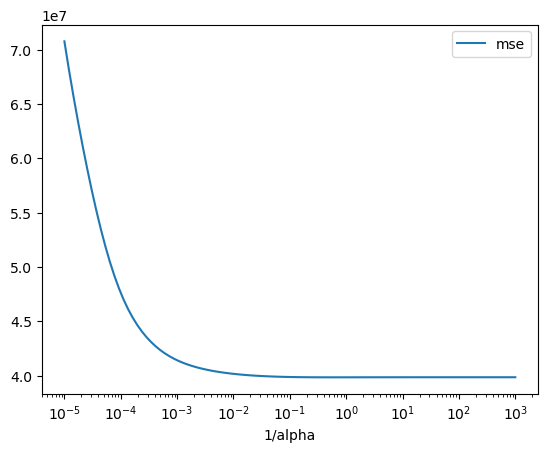

In [1036]:
alpha.plot.line(x='1/alpha', y='mse', logx=True)

The plot also shows MSE doesn't change much until alpha is about 100. The best value of 1.707 isn't obvious in this plot.

In [1041]:
ridge_train_preds[0: 20]

array([44364.45750384, 34620.31012468, 35355.87880611, 19135.33701402,
        9165.32156528, 15444.8264135 , 11110.10894992,  5802.57004361,
       22568.73073974,  7229.78749017, 35177.39817948,  7170.976481  ,
        9986.65855941, 15796.75208666, 15568.68349327,  7766.05602117,
       13618.25414133,  3212.79593349, 13408.28970325, 16325.04993103])

<h3>Prediction and price comparison for 20 cars

We can see the model does a fair to good job. Some predictions are really close to actual prices while some are quite differents. There are certainly room for fine tuning the model.

In [1046]:
pd.DataFrame({'prediction':ridge_train_preds[:20], 'price': y_train[:20]})

,prediction,price
37884,44364.457504,44995
95473,34620.310125,27850
22383,35355.878806,36995
39501,19135.337014,15995
31894,9165.321565,7500
94871,15444.826414,22995
81930,11110.108950,8495
62849,5802.570044,13500
33858,22568.730740,23998
37001,7229.787490,10500


In [1048]:
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
ridge_train_mse

40188445.97214514

In [1050]:
ridge_test_mse

40484603.246340066

In [1052]:
coef = best_model.named_steps['ridge'].coef_
coef

array([ 2.10205061e+02, -6.02660465e+02,  7.21367816e+01,  3.03193741e+01,
        2.31657440e+02, -5.19746894e+02, -6.23200064e+01, -3.21523677e+02,
       -1.79609663e+02, -6.28285054e+02,  2.55433054e+02,  1.51439405e+03,
        1.65263067e+02,  1.69084893e+03,  1.10208383e+03, -1.13152632e+03,
        8.78035279e+02, -1.43423424e+03, -2.37778690e+03, -3.56727797e+03,
       -5.37376432e+03, -3.27182918e+02,  3.57115468e+02,  1.71485031e+02,
       -1.97055205e+03, -1.35495650e+03,  2.07845134e+03,  1.55649457e+02,
       -2.38768607e+03,  4.07185996e+03,  3.04146091e+01, -1.00743916e+03,
        3.05136849e+03, -1.81081735e+03, -1.80666802e+03,  1.09433566e+02,
       -3.38753032e+03,  8.19163522e+01,  1.29011336e+04,  7.93005886e+01,
        4.37734163e+03, -1.19122744e+03, -2.06092940e+03,  9.77428919e+02,
       -1.27261767e+03,  1.83066473e+02,  1.79210145e+03,  4.56132864e+02,
       -3.89591892e+02,  2.79241607e+03,  1.74734609e+03,  8.25727716e+02,
       -1.70977580e+03, -

<h3>Use a dataframe to examine the feature-coeffocient

We do see lexus and mercedes to have large positive cofficients, while dodge and chevrolet have large negative coefficients, fiat and chrysler are also very negative.

California does have a large positive cofficient through not the largest.

Cylinder has a cofficient of 1260, odometer has -1524 and age has 921. As we mentioned more cylinder normally mean larger and more powerful cars, it makes sens to have significant positive contribution. It also makes sense to have a significant negative coefficient for odometer. The coefficient of age is harder to explain, I expect it to have a negative coefficient but it doesn't, I think it makes sense that odometer contrinutes more than age.

For vehicle type, truck and pickup have the largest positive coefficients of 4161 and 3906, while sedan and wagan have the largest negative coefficients of -2793 and -2140. I think people are more willing buy used pickups or trucks so thus their keep values pretty well. We know sedans and wagon are falling out of favor in new car market, not a surprise to see the same trend in used cars.

For color, I see yellow, white, green, black to have the highest positive coefficients of 1514, 255, 231 adn 210. While silver, blue and grey have the largest negative coefficients of -628, -602 and -519. These are harder to understand, there are very few yellow cars so maybe people like them when available. It's a surprise to see grey and silver to have not favorable. We will use analysis of specific brand-model to see if we can see more insights into these.

In [1059]:
pd.DataFrame({'columns': df9.columns, 'coef': coef})

,columns,coef
0,black,210.205061
1,blue,-602.660465
2,brown,72.136782
3,custom,30.319374
4,green,231.657440
...,...,...
127,cylinders age^2,6077.095747
128,odometer^3,4480.037205
129,odometer^2 age,-3178.812072
130,odometer age^2,-430.178711


<h2>The Lasso Model

Run the Lasso model will alpha between 0.1 and 1000,000.

**!!  This model takes more than 5 minutes to fit.   !!**

Got some warnings like:

*/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+12, tolerance: 1.381e+09
  model = cd_fast.enet_coordinate_descent(*

However the model does complete, and its best_estimator can be used to make predictions.

In [1063]:
lasso_model = Pipeline([('lasso', Lasso())])

In [1065]:
parems = {'lasso__alpha': 10 ** np.linspace(-1, 6, 50)}

In [1067]:
mf2 = GridSearchCV(lasso_model, param_grid=parems, scoring='neg_mean_squared_error', cv=[[train_idx, test_idx]])

In [1069]:
mf2.fit(df9, y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+12, tolerance: 1.381e+09

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.584e+12, tolerance: 1.381e+09

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.563e+12, tolerance: 1.381e+09

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

GridSearchCV(cv=[[array([67631, 63551, 30868, ..., 77010, 89111,  6902]),
                  array([44755, 34339, 86582, ...,  3278, 14592, 83810])]],
             estimator=Pipeline(steps=[('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68...
       1.00000000e+03, 1.38949549e+03, 1.93069773e+03, 2.68269580e+03,
       3.72759372e+03, 5.17947468e+03, 7.19685673e+03, 1.00000000e+04,
       1.38949549e+04, 1.93069773e+04, 2.68269580e+04, 3.72759372e+04,
       5.17947468e+04, 7.19685673e+04, 1.00000000e+05, 1.38949549e+05,
       1.93069773e+05, 2.68269580e+05, 3.72759372e+05, 5.17947468e+05,
       7.19685673e+05, 1.00000000e+06])},
             scoring='neg_mean_squared_error')

In [1071]:
best_model2 = mf2.best_estimator_

In [1073]:
# best_model2.predict(df9)

In [1075]:
coef = best_model2.named_steps['lasso'].coef_
coef

array([ 2.18006277e+02, -6.08470017e+02,  6.84449877e+01,  4.78755355e+01,
        1.65852770e+02, -5.00934870e+02, -1.85128441e+00, -1.52504762e+02,
       -1.74374682e+02, -6.40878455e+02,  2.46632783e+02,  1.49210474e+03,
        8.77434919e+01,  1.70133330e+03,  9.97587643e+02, -1.25605775e+03,
        9.23563655e+02, -1.38329239e+03, -2.33777395e+03, -3.45502697e+03,
       -4.99691653e+03, -2.99828005e+02,  4.23325059e+02,  2.12094988e+02,
       -1.94718597e+03, -1.38683377e+03,  1.83157579e+03,  1.49348058e+02,
       -2.34219691e+03,  4.02910977e+03,  1.09635852e+02, -9.24828686e+02,
        3.00229963e+03, -1.63838645e+03, -1.53739216e+03,  1.67988632e+02,
       -3.36940241e+03,  0.00000000e+00,  1.27710984e+04,  1.69410883e+02,
        4.38992132e+03, -1.07211435e+03, -2.03728787e+03,  1.02961403e+03,
       -1.24430718e+03, -0.00000000e+00,  1.83589190e+03,  5.93273003e+02,
       -1.51555759e+02,  2.96838832e+03,  1.89162204e+03,  1.00194476e+03,
       -1.52666395e+03, -

Create a dataframe for features/columns and their coeficients

In [1079]:
pd.DataFrame({'columns': df9.columns, 'coef': coef})

,columns,coef
0,black,218.006277
1,blue,-608.470017
2,brown,68.444988
3,custom,47.875536
4,green,165.852770
...,...,...
127,cylinders age^2,3075.478773
128,odometer^3,2073.017791
129,odometer^2 age,-3917.658223
130,odometer age^2,-471.532626


In [1082]:
lasso_train_preds = mf2.best_estimator_.predict(X_train)
lasso_test_preds = mf2.best_estimator_.predict(X_test)

In [1084]:
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)
lasso_train_mse

40441627.770458505

In [1086]:
lasso_test_mse

40716126.68216378

In [1088]:
list(zip (mf2.cv_results_['rank_test_score'], parems['lasso__alpha']))

[(7, 0.1),
 (5, 0.13894954943731375),
 (4, 0.193069772888325),
 (2, 0.2682695795279726),
 (1, 0.372759372031494),
 (3, 0.517947467923121),
 (6, 0.7196856730011519),
 (8, 1.0),
 (9, 1.3894954943731375),
 (10, 1.9306977288832496),
 (11, 2.6826957952797246),
 (12, 3.72759372031494),
 (13, 5.17947467923121),
 (14, 7.196856730011517),
 (15, 10.0),
 (16, 13.894954943731374),
 (17, 19.306977288832496),
 (18, 26.826957952797247),
 (19, 37.27593720314938),
 (20, 51.794746792312075),
 (21, 71.96856730011514),
 (22, 100.0),
 (23, 138.94954943731375),
 (24, 193.06977288832496),
 (25, 268.26957952797244),
 (26, 372.7593720314938),
 (27, 517.9474679231207),
 (28, 719.6856730011514),
 (29, 1000.0),
 (30, 1389.4954943731361),
 (31, 1930.6977288832495),
 (32, 2682.695795279722),
 (33, 3727.593720314938),
 (34, 5179.474679231213),
 (35, 7196.856730011514),
 (36, 10000.0),
 (36, 13894.95494373136),
 (36, 19306.977288832495),
 (36, 26826.95795279722),
 (36, 37275.93720314938),
 (36, 51794.74679231202),
 (

rank_test_score indicates the best alpha is 0.373

In [1092]:
mf2.cv_results_

{'mean_fit_time': array([37.73165703, 30.12999129, 38.31012988, 33.66679096, 38.47203302,
        34.67502213, 29.69019914, 39.36087489, 30.74028587, 34.82630396,
        30.02234006, 35.25986886, 28.26317382, 37.03282475, 37.36896586,
        27.22411919, 36.21132898, 31.80455089, 43.14716315, 31.75562191,
        21.76532125, 27.87278008, 19.58255625,  7.32655215,  7.0451901 ,
         9.40238595,  3.77351809,  0.6709342 ,  2.22635889,  1.72594309,
         1.3509841 ,  0.26336288,  1.93445611,  0.40040493,  0.12823296,
         0.1157639 ,  0.11011696,  0.10712385,  0.10346699,  0.11471677,
         0.11171222,  0.11755395,  0.12758112,  0.10809898,  0.10720706,
         0.12906027,  0.36618209,  0.17503309,  0.16025114,  0.13935995]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_sc

In [1095]:
list(zip(mf2.cv_results_['split0_test_score'], parems['lasso__alpha']))

[(-40064905.54520279, 0.1),
 (-40064517.44209699, 0.13894954943731375),
 (-40064118.33100748, 0.193069772888325),
 (-40063714.79791747, 0.2682695795279726),
 (-40063466.87844726, 0.372759372031494),
 (-40063715.89753149, 0.517947467923121),
 (-40064536.460067384, 0.7196856730011519),
 (-40067038.82321866, 1.0),
 (-40074394.56824355, 1.3894954943731375),
 (-40092199.63600984, 1.9306977288832496),
 (-40130441.52599561, 2.6826957952797246),
 (-40195958.2730757, 3.72759372031494),
 (-40294974.81625801, 5.17947467923121),
 (-40445917.281971745, 7.196856730011517),
 (-40622849.16243881, 10.0),
 (-40906192.41502659, 13.894954943731374),
 (-41315637.81487754, 19.306977288832496),
 (-41913989.57532048, 26.826957952797247),
 (-42742371.36057585, 37.27593720314938),
 (-43581129.52708105, 51.794746792312075),
 (-44766873.48899299, 71.96856730011514),
 (-45751850.72320742, 100.0),
 (-46910894.58969693, 138.94954943731375),
 (-48647601.18157555, 193.06977288832496),
 (-51101037.670611374, 268.269579

<h4> Creat a plot for MSE against 1/alpha

In [1098]:
alpha = pd.DataFrame({'alpha': mf2.cv_results_['param_lasso__alpha'], 'score': mf2.cv_results_['split0_test_score']})

In [1100]:
alpha['1/alpha'] = 1/alpha['alpha']
alpha['mse'] = -alpha['score']

Here we see MSE getsclose to its minimal value of about 4*(10**7) when alpha is below 10. The best value of 0.373 is in the flat area.

<Axes: xlabel='1/alpha'>

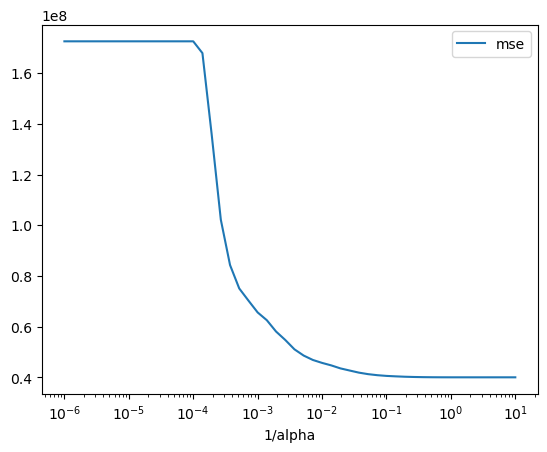

In [1104]:
alpha.plot.line(x='1/alpha', y='mse', logx=True)

<h2>Compare All models

Adding ridge and lasso models into comparison, we can see both ridge and lasso get pretty close to Linear Regression, and the ridge model has the lowest test MSE by a small margin.

In [1108]:
data = [['Linear', linear_mse_train, linear_mse_test], ['SFS-5', model_train_mse5, model_test_mse5], ['SFS-10', model_train_mse10, model_test_mse10], ['SFS-20', model_train_mse20, model_test_mse20], ['ridge', ridge_train_mse, ridge_test_mse],['lasso', lasso_train_mse, lasso_test_mse]]
df = pd.DataFrame(data, columns=['model', 'train MSE', 'test MSE'])
df

,model,train MSE,test MSE
0,Linear,4.017385e+07,4.057258e+07
1,SFS-5,5.425768e+07,5.507502e+07
2,SFS-10,4.664791e+07,4.692533e+07
3,SFS-20,4.341264e+07,4.355135e+07
4,ridge,4.018845e+07,4.048460e+07
5,lasso,4.044163e+07,4.071613e+07


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**With the model comparison info, I would choose the ridge model to deploy because its test MSE is the lowest and it's less likely to be overfitting because of the constrain of alpha.**

In [1115]:
y.mean()

17699.78727980336

In [1117]:
y.describe()

count    107404.000000
mean      17699.787280
std       13102.743525
min        2004.000000
25%        7995.000000
50%       13990.000000
75%       23995.000000
max       99999.000000
Name: price, dtype: float64

<h2>Additional Analysis, Toyota Camry and Ford F-150

Let's use two popolar models to do some analysis, one is Toyota Camry and the other is Ford F-150, they are the most popular models for these two manufacturers.
I will use the dataframe without one-hot encoding and feature engineering for this evaluation.

In [1123]:
df5

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
31,15000,ford,f-150 xlt,6,128000.0,automatic,rwd,truck,black,al,9.0
34,35000,toyota,tacoma,6,43000.0,automatic,4wd,truck,grey,al,3.0
55,19900,ford,f250 super duty,8,88000.0,automatic,4wd,pickup,blue,al,18.0
59,14000,honda,odyssey,6,95000.0,automatic,fwd,mini-van,silver,al,10.0
73,15000,dodge,charger rt 4dr sedan,8,90000.0,automatic,rwd,sedan,grey,al,5.0
...,...,...,...,...,...,...,...,...,...,...,...
426823,37590,mercedes-benz,gle 350 sport,6,16482.0,automatic,rwd,SUV,black,wy,4.0
426828,10550,nissan,kicks,4,74425.0,automatic,fwd,SUV,silver,wy,4.0
426829,6950,nissan,altima s,4,110637.0,automatic,fwd,sedan,silver,wy,8.0
426830,5950,nissan,rogue s awd,4,95667.0,automatic,4wd,SUV,white,wy,9.0


In [1126]:
# select the Toyota Camry
df12 = df5[(df5['manufacturer'] == 'toyota') & (df5['model'] == 'camry')]

In [1127]:
df12

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
310,4499,toyota,camry,4,170687.0,automatic,fwd,sedan,blue,al,17.0
381,10800,toyota,camry,4,147000.0,automatic,fwd,sedan,grey,al,9.0
469,12499,toyota,camry,4,64950.0,automatic,fwd,sedan,red,al,10.0
472,7999,toyota,camry,6,67650.0,automatic,fwd,sedan,custom,al,15.0
647,8500,toyota,camry,4,114500.0,automatic,fwd,sedan,blue,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...
422511,9300,toyota,camry,4,73000.0,automatic,fwd,sedan,black,wi,9.0
423315,11695,toyota,camry,4,124602.0,automatic,fwd,sedan,blue,wi,5.0
423870,7899,toyota,camry,4,111138.0,automatic,fwd,sedan,custom,wi,11.0
425528,8998,toyota,camry,4,111325.0,automatic,fwd,sedan,blue,wi,11.0


Let's first check paint colors

In [1130]:
df12['paint_color'].value_counts()

paint_color
grey      209
silver    207
white     155
black     129
red        90
blue       84
custom     66
green      35
brown      29
yellow      4
Name: count, dtype: int64

In [1132]:
df12.groupby(['paint_color'])['price'].mean().sort_values()

paint_color
yellow     4909.750000
green      6744.457143
blue      10381.238095
silver    10771.391304
grey      11139.789474
brown     12505.758621
black     12525.651163
red       12576.944444
white     13792.219355
custom    14370.742424
Name: price, dtype: float64

We see yellow has only 4 samples, its average price (while low) probably doesn't mean much.
We see custom, white, red and black to have good value.

Let's have a plot of price against odometer and color by paint_color.

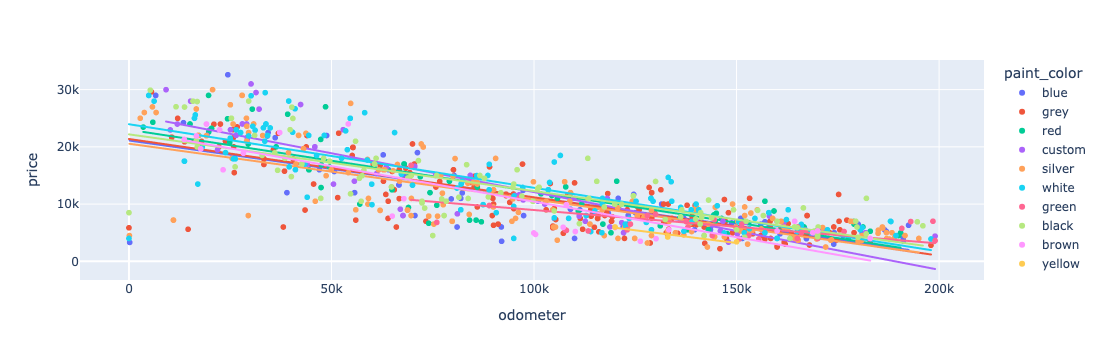

In [1141]:
px.scatter(df12, x='odometer', y='price', color='paint_color', trendline='ols')

The plot and lines show what we have expected - odometer impacts price in a negative way. We also see the price viriance is larger when cars are newer, price converge to the line/trend pretty well at around 100,000 miles. This means there are other factors affect price significantly when mileage are low, for example the actual condition (not the condition listed in the dataframe) probably matters a lot.

<h3>Ford F-150

Let's also check how paint color affect price

In [1146]:
df21 = df5[df5['manufacturer'] == 'ford']

In [1148]:
df22 = df21[df21['model'] == 'f-150']

In [1151]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2312 entries, 337 to 426715
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2312 non-null   int64  
 1   manufacturer  2312 non-null   object 
 2   model         2312 non-null   object 
 3   cylinders     2312 non-null   int64  
 4   odometer      2312 non-null   float64
 5   transmission  2312 non-null   object 
 6   drive         2312 non-null   object 
 7   type          2312 non-null   object 
 8   paint_color   2312 non-null   object 
 9   state         2312 non-null   object 
 10  age           2312 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 216.8+ KB


In [1153]:
df22.sample(10)

,price,manufacturer,model,cylinders,odometer,transmission,drive,type,paint_color,state,age
189716,12900,ford,f-150,8,151783.0,automatic,4wd,pickup,blue,ma,11.0
312118,44495,ford,f-150,6,25163.0,automatic,4wd,truck,silver,or,3.0
335539,8800,ford,f-150,8,143000.0,automatic,4wd,truck,silver,pa,15.0
314651,17995,ford,f-150,6,108410.0,automatic,rwd,truck,white,or,10.0
270848,10999,ford,f-150,8,130030.0,automatic,4wd,truck,white,ny,15.0
284690,34900,ford,f-150,6,52000.0,automatic,4wd,pickup,grey,nh,4.0
195536,54988,ford,f-150,6,15330.0,automatic,4wd,truck,black,mi,2.0
190133,33900,ford,f-150,6,18635.0,automatic,4wd,truck,silver,ma,3.0
156142,24900,ford,f-150,6,56864.0,automatic,4wd,truck,grey,ia,9.0
144891,36995,ford,f-150,8,90439.0,automatic,4wd,pickup,black,il,8.0


In [1156]:
df22.groupby(['paint_color'])['price'].mean().sort_values()

paint_color
green     15656.047619
yellow    18378.111111
brown     20147.037037
red       20326.201521
blue      24293.409091
white     25378.559271
orange    26122.500000
grey      26265.523026
black     26928.639381
silver    28641.336996
custom    32130.092105
purple    34595.000000
Name: price, dtype: float64

In [1158]:
df22['paint_color'].value_counts()

paint_color
white     658
black     452
grey      304
silver    273
red       263
blue      198
custom     76
brown      54
green      21
yellow      9
purple      2
orange      2
Name: count, dtype: int64

Orange, purple and yellow have very few samples, probably should not draw conclusion for them.
We see custom, silver black and grey have good prices.

Next, let's also have a plot for price against odometer colored with paint_color. We see very similar as the Toyota Camry.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning:

divide by zero encountered in scalar divide



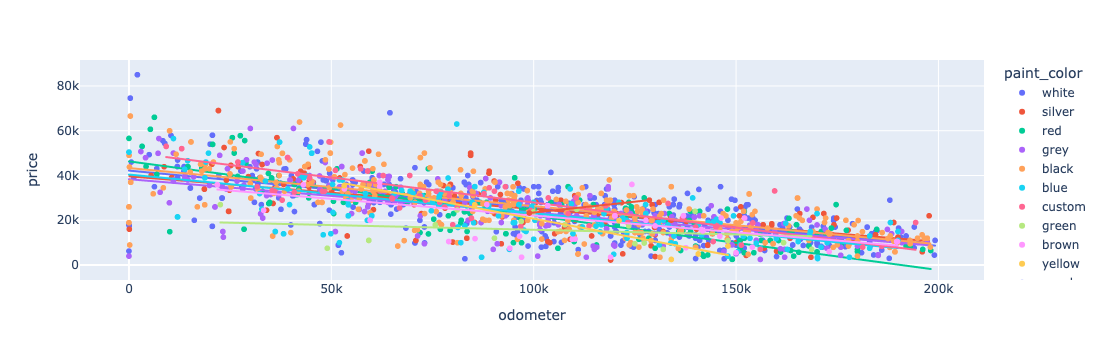

In [1163]:
px.scatter(df22, x='odometer', y='price', color='paint_color', trendline='ols')

In [1165]:
df12['paint_color'].value_counts()

paint_color
grey      209
silver    207
white     155
black     129
red        90
blue       84
custom     66
green      35
brown      29
yellow      4
Name: count, dtype: int64

### Deployment


As said, I chose the Ridge model for deployment, some notes for building used car inventory:
1. Never rely on owner/seller description of the car's condition, those are too subjective, one could say their 20 years old 180,000 miles car is "like new" which cannot be true. Similarly you should not believe a 1-year old 2000 miles car is like new either.
2. odometer reading is more important than age, a 5-years old 20,000 miles car is probably more valuable than a 2-years old 100,000 miles car.
3. Powerful and larger cars are more valuable which should be easy to understand
4. Pickup and trucks have good resale values as people don't seem to mind buying used ones.
5. Used sedans and wagons are more and more out of favor, don't get too many of them and don't pay too much for them.
6. Paint color does make a difference, custom color has the highest value and black/silver/white/grey also hold value well, don't pay too much for other colors.
7. Some brands should be avoid, e.g. Fiat, chrysler, chevolet and dodge


<h2> Final Thought</h2>
As we see in the pridiction vs actural price comparison of the ridge model, some samples have big difference. One hypothesis is this comes from the situation that no accurate condition description can be relied on. Two cars both at 3-years old and 30,000 miles can have very different conditions, one could be worth \$25,000 while the other might be \$15,000.